<a href="https://colab.research.google.com/github/Anshuldogra001/Grip_Internship/blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name- Abhinav Dogra
#Task 7- Stock market prediction using numerical and textual analysis.
#Grip@ The Spark foundation network
* To perform ‘Numerical and textual analysis’ on stock of ‘Tesla’ and also to perform 'sentimental analysis' of 'News headlines'.

* Create a hybrid model for stock performance prediction using numerical analysis of historical stock prices and sentimental analysis of News headlines

* We are going to use python 

In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
import lightgbm

In [2]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 18.2 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:

import yfinance as yf
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import datasets
from plotnine import *

In [4]:
sensex=yf.Ticker("TSLA")

In [5]:
tesla_data=sensex.history(period="max")

In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [7]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3015 non-null   datetime64[ns]
 1   Open          3015 non-null   float64       
 2   High          3015 non-null   float64       
 3   Low           3015 non-null   float64       
 4   Close         3015 non-null   float64       
 5   Volume        3015 non-null   int64         
 6   Dividends     3015 non-null   int64         
 7   Stock Splits  3015 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 188.6 KB


In [8]:
tesla_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3015.000000,3015.000000,3015.000000,3015.000000,3.015000e+03,3015.0,3015.000000
mean,152.860160,156.295366,149.099292,152.793288,3.125964e+07,0.0,0.001658
std,268.030837,274.282263,260.965531,267.722486,2.772945e+07,0.0,0.091060
min,3.228000,3.326000,2.996000,3.160000,5.925000e+05,0.0,0.000000
25%,21.327001,22.099999,20.716000,21.641000,1.343515e+07,0.0,0.000000
50%,47.200001,48.000000,46.324001,47.321999,2.513300e+07,0.0,0.000000
75%,69.292000,70.299000,68.170002,69.257999,3.958545e+07,0.0,0.000000
max,1234.410034,1243.489990,1217.000000,1229.910034,3.046940e+08,0.0,5.000000


In [9]:
tesla_data.cov()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,7.184053e+04,7.349621e+04,6.991787e+04,7.170033e+04,5.656400e+08,0.0,0.483991
High,7.349621e+04,7.523076e+04,7.154842e+04,7.340446e+04,6.062597e+08,0.0,0.570412
Low,6.991787e+04,7.154842e+04,6.810301e+04,6.984324e+04,5.241779e+08,0.0,0.482765
Close,7.170033e+04,7.340446e+04,6.984324e+04,7.167533e+04,5.708353e+08,0.0,0.573203
Volume,5.656400e+08,6.062597e+08,5.241779e+08,5.708353e+08,7.689222e+14,0.0,144516.862381
Dividends,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000
Stock Splits,4.839911e-01,5.704125e-01,4.827649e-01,5.732029e-01,1.445169e+05,0.0,0.008292


In [10]:
tesla_data.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999729,0.999586,0.999198,0.076105,NaN,0.019830
High,0.999729,1.000000,0.999584,0.999631,0.079711,NaN,0.022838
Low,0.999586,0.999584,1.000000,0.999669,0.072436,NaN,0.020315
Close,0.999198,0.999631,0.999669,1.000000,0.076893,NaN,0.023512
Volume,0.076105,0.079711,0.072436,0.076893,1.000000,NaN,0.057234
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,0.019830,0.022838,0.020315,0.023512,0.057234,NaN,1.000000


Text(0, 0.5, 'Close')

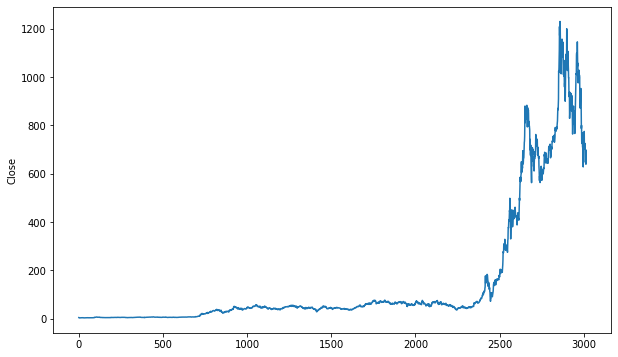

In [11]:
plt.figure(figsize=(10, 6))
tesla_data['Close'].plot()
plt.ylabel('Close')

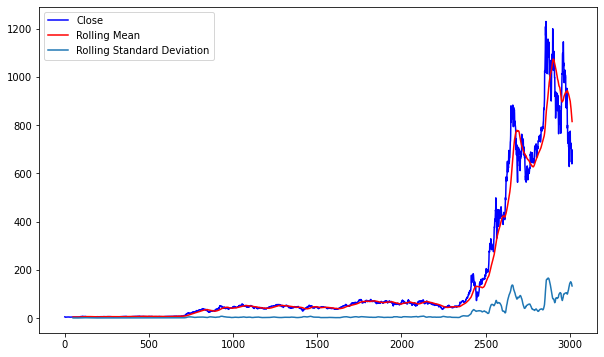

In [12]:
#Plotting moving average
close = tesla_data['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
tesla_data['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

In [13]:

train = tesla_data[:1000]
test = tesla_data[1000:]

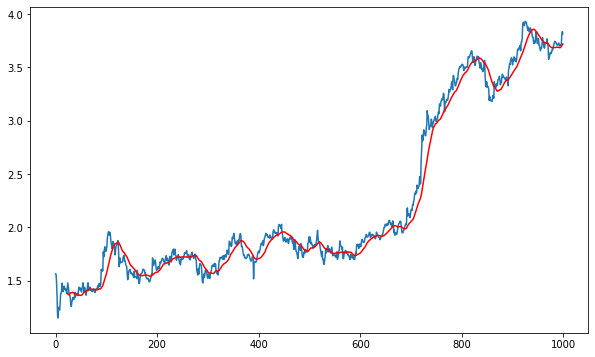

In [14]:
import numpy as np
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red') 

In [15]:
!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 15.0 MB/s 
     |████████████████████████████████| 9.8 MB 48.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [16]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3721.935, Time=2.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3725.335, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3723.519, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3723.543, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3723.717, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3721.430, Time=0.40 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.575 seconds


Text(0, 0.5, 'Actual Stock Price')

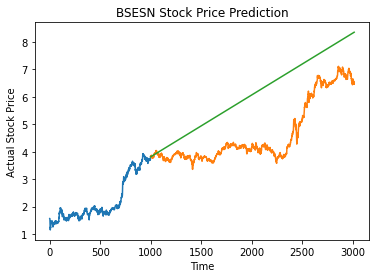

In [17]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [18]:
#Calculating error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  1.6138218757443599


In [19]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

data  = requests.get(url).text

In [20]:
soup = BeautifulSoup(data, 'html5lib')

In [21]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [22]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [23]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [24]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [25]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [26]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

#Textual Data Analysis

In [27]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('/content/india-news-headlines.zip') 
cols = ['Date','Category','News']
df_news = pd.read_csv(zf.open('india-news-headlines.csv'),names = cols)
df_news

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3650966,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650967,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650969,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [28]:
from numpy import concatenate
from math import sqrt
from matplotlib import pyplot
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from sklearn.preprocessing import MinMaxScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [29]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650970 entries, 1 to 3650970
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 83.6+ MB


In [30]:
df_news.head()

,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic


In [31]:
# Converting 'Date' columns from both our dataframes to type datetime
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...,...
3010,2022-06-13,669.500000,679.900024,644.049988,647.210022,34255800,0,0.0
3011,2022-06-14,654.859985,678.989990,635.210022,662.669983,32662900,0,0.0
3012,2022-06-15,662.750000,706.989990,654.450012,699.000000,39710600,0,0.0
3013,2022-06-16,668.210022,675.500000,626.080017,639.299988,35796900,0,0.0


In [32]:
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...
7713,2022-03-28,As fashion becomes democratic; demand for styl...
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...
7715,2022-03-30,I will not give in to trends: Dossmode The tim...


In [33]:
df_news.isnull().sum()

Date    0
News    0
dtype: int64

In [34]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [35]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.369592,0.025109
7713,2022-03-28,As fashion becomes democratic; demand for styl...,0.389939,0.055878
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...,0.404240,0.095198
7715,2022-03-30,I will not give in to trends: Dossmode The tim...,0.350965,0.037729


In [36]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()



In [37]:
df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]

df_news

,Date,News,Subjectivity,Polarity,Compound
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215
...,...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.369592,0.025109,-0.9999
7713,2022-03-28,As fashion becomes democratic; demand for styl...,0.389939,0.055878,-0.9999
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...,0.404240,0.095198,-0.9999
7715,2022-03-30,I will not give in to trends: Dossmode The tim...,0.350965,0.037729,-0.9999


In [38]:
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]

In [39]:
df_merge = pd.merge(tesla_data, df_news, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0,Do second marriages always work? Dino Morea at...,0.383892,0.066612,-0.9998,0.165,0.741,0.094
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0,SRK cut to size! How to boot up Windows XP Gre...,0.375937,0.016107,-0.9998,0.171,0.755,0.074
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0,Hotel Hollywood; a must watch! Kat's not a cry...,0.431147,0.008628,-0.9999,0.192,0.720,0.088
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0,Read between the 'signs' Race row threatens to...,0.402362,0.037051,-0.9999,0.180,0.735,0.085
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0,Burger Shurger Hai Rabba! Personality can pred...,0.391936,0.051600,-0.9999,0.166,0.762,0.072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,2022-03-25,1008.000000,1021.799988,997.320007,1010.640015,20677200,0,0.0,Speeding up; shortcuts and tackling unruly cus...,0.373186,-0.011731,-1.0000,0.178,0.751,0.072
2957,2022-03-28,1065.099976,1097.880005,1053.599976,1091.839966,34168700,0,0.0,As fashion becomes democratic; demand for styl...,0.389939,0.055878,-0.9999,0.158,0.742,0.100
2958,2022-03-29,1107.989990,1114.770020,1073.109985,1099.569946,24538300,0,0.0,Bobby Deol: Like my dad; I hope to be working ...,0.404240,0.095198,-0.9999,0.152,0.766,0.082
2959,2022-03-30,1091.170044,1113.949951,1084.000000,1093.989990,19955000,0,0.0,I will not give in to trends: Dossmode The tim...,0.350965,0.037729,-0.9999,0.151,0.775,0.074


In [40]:
dfmerge1 = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
dfmerge1

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,4.778000,0.383892,0.066612,-0.9998,0.165,0.741,0.094
1,4.766000,0.375937,0.016107,-0.9998,0.171,0.755,0.074
2,4.392000,0.431147,0.008628,-0.9999,0.192,0.720,0.088
3,3.840000,0.402362,0.037051,-0.9999,0.180,0.735,0.085
4,3.222000,0.391936,0.051600,-0.9999,0.166,0.762,0.072
...,...,...,...,...,...,...,...
2956,1010.640015,0.373186,-0.011731,-1.0000,0.178,0.751,0.072
2957,1091.839966,0.389939,0.055878,-0.9999,0.158,0.742,0.100
2958,1099.569946,0.404240,0.095198,-0.9999,0.152,0.766,0.082
2959,1093.989990,0.350965,0.037729,-0.9999,0.151,0.775,0.074


In [41]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(dfmerge1))
df.columns = dfmerge1.columns
df.index = dfmerge1.index
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.001319,0.340057,0.484856,0.00010,0.603053,0.355330,0.379032
1,0.001309,0.296604,0.212631,0.00010,0.648855,0.426396,0.217742
2,0.001004,0.598172,0.172318,0.00005,0.809160,0.248731,0.330645
3,0.000554,0.440943,0.325521,0.00005,0.717557,0.324873,0.306452
4,0.000051,0.383994,0.403939,0.00005,0.610687,0.461929,0.201613


In [42]:
df.duplicated().sum()

0

In [43]:
X=df.drop('Close',axis=1)
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.340057,0.484856,0.00010,0.603053,0.355330,0.379032
1,0.296604,0.212631,0.00010,0.648855,0.426396,0.217742
2,0.598172,0.172318,0.00005,0.809160,0.248731,0.330645
3,0.440943,0.325521,0.00005,0.717557,0.324873,0.306452
4,0.383994,0.403939,0.00005,0.610687,0.461929,0.201613
...,...,...,...,...,...,...
2956,0.281577,0.062583,0.00000,0.702290,0.406091,0.201613
2957,0.373085,0.427000,0.00005,0.549618,0.360406,0.427419
2958,0.451202,0.638936,0.00005,0.503817,0.482234,0.282258
2959,0.160202,0.329174,0.00005,0.496183,0.527919,0.217742


In [44]:
Y=df['Close']
Y

0       0.001319
1       0.001309
2       0.001004
3       0.000554
4       0.000051
          ...   
2956    0.821259
2957    0.887451
2958    0.893752
2959    0.889203
2960    0.875843
Name: Close, Length: 2961, dtype: float64

###Spliting data into training and testing set

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
x_train.shape

(2368, 6)

In [46]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
119,0.427678,0.704371,0.00135,0.297710,0.472081,0.516129
1471,0.495024,0.512905,0.00005,0.648855,0.294416,0.427419
1451,0.407585,0.431618,0.00000,0.725191,0.238579,0.435484
2529,0.409668,0.450087,0.00010,0.297710,0.644670,0.241935
1077,0.605517,0.642649,0.00005,0.534351,0.314721,0.516129
1539,0.241838,0.423740,0.00005,0.496183,0.467005,0.314516
1355,0.543160,0.724461,0.00040,0.290076,0.517766,0.451613
1652,0.416410,0.584729,0.00005,0.587786,0.274112,0.532258
2440,0.399977,0.468866,0.00005,0.610687,0.263959,0.516129
2415,0.514757,0.671149,0.00030,0.404580,0.370558,0.564516


##AdaBoostRegressor

In [47]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)

AdaBoostRegressor()

In [48]:
predictions = adb.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.03437073991073958


##LGBMRegressor

In [49]:
gbm = lightgbm.LGBMRegressor()
gbm.fit(x_train, y_train)

LGBMRegressor()

In [50]:
predictions = gbm.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.03151377835586033


##RandomForestRegressor

In [51]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [52]:
print(prediction[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(prediction,y_test))

[0.22725589 0.22601364 0.19006659 0.02222671 0.65969141 0.02911522
 0.01848616 0.34371865 0.0269705  0.07452206]
2037    0.046471
643     0.003029
118     0.002250
252     0.002007
2805    0.546411
1083    0.034326
719     0.006520
2461    0.086903
2410    0.088399
1857    0.046821
Name: Close, dtype: float64
Mean Squared error:  0.03141487612883975


##DecisionTreeRegressor

In [53]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [54]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.05921173 0.03105278 0.22149418 0.0418064  0.86532702 0.00178684
 0.0241826  0.8434481  0.01721296 0.03540249]
2037    0.046471
643     0.003029
118     0.002250
252     0.002007
2805    0.546411
1083    0.034326
719     0.006520
2461    0.086903
2410    0.088399
1857    0.046821
Name: Close, dtype: float64
0.06661529114307158


Different predictions from different models..
* DecisionTreeRegressor - 0.06661529114307158
* RandomForestRegressor - 0.03141487612883975
* LGBMRegressor - 0.03151377835586033
* AdaBoostRegressor - 0.03437073991073958

#Thank You.....